<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/main/Projet_article__Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import cv2
import imutils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab.patches import cv2_imshow

In [ ]:
cha3b = os.path.join('/content/drive/My Drive/','cha3b.pdf')
elhayatalarabiya = os.path.join('/content/drive/My Drive/', 'elhayatalarabiya.pdf')
assabah = os.path.join('/content/drive/My Drive/', 'assabah.pdf')

In [ ]:
print(cha3b)

/content/drive/My Drive/cha3b.pdf


**SELECT_ARTICLE**

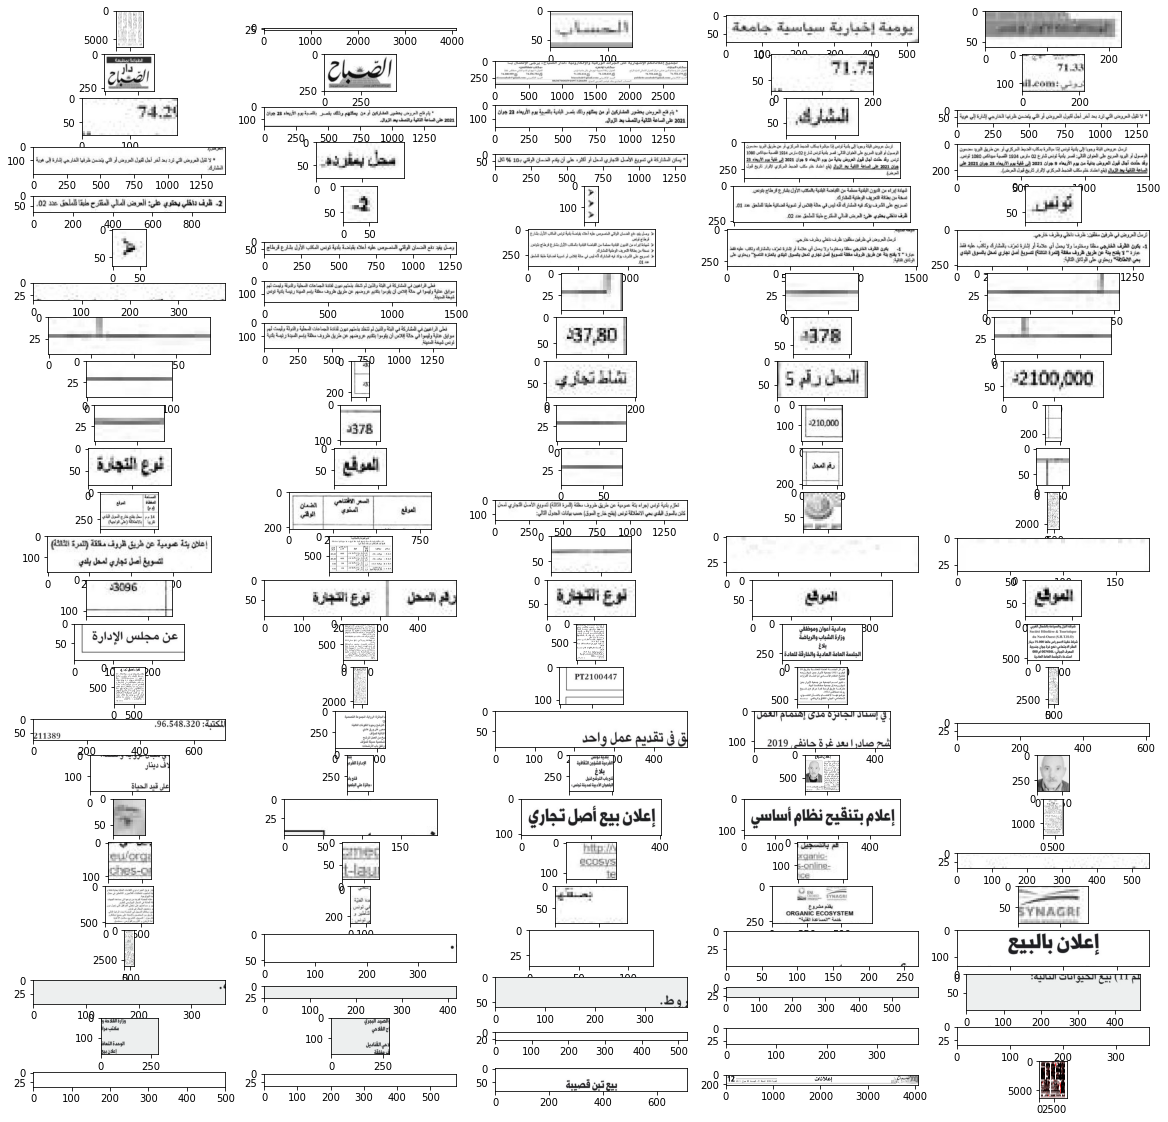

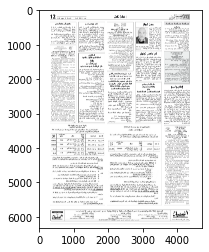

In [39]:
import sys
import numpy as np
import skimage.io
import skimage.filters
import cv2
import numpy as np
import matplotlib.pyplot as plt

l = []
image = cv2.imread('/content/drive/MyDrive/ImagesFromPDF/0012.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#l.append(img_gray)
# Median filter to remove JPEG noise

blur = cv2.GaussianBlur(image, (5, 5), 0)
thresh4=cv2.threshold(blur,120, 255,cv2.THRESH_BINARY_INV)[1]

kernel = np.ones((5,5),np.uint8)
dilation3 = cv2.dilate(thresh4,kernel,iterations = 10)
#l.append(dilation3)

# using a findContours() function
thre=cv2.threshold(dilation3,120, 255,cv2.THRESH_BINARY_INV)[1]
img_gray = cv2.cvtColor(thre, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# list for storing names of shapes
for contour in contours:      
    # using drawContours() function
    cv2.drawContours(thre, [contour], 0, (255, 0, 0), 5)

# Look through contours, checking what we found
blob = 0
for i in range(len(contours)):
    area  = cv2.contourArea(contours[i])
    # Only consider ones taller than around 100 pixels and wider than about 300 pixels
    if area > 3000:
        # Get cropping box and crop
        rc = cv2.minAreaRect(contours[i])
        box = cv2.boxPoints(rc)
        Xs = [ box[0,0], box[1,0], box[2,0], box[3,0]]
        Ys = [ box[0,1], box[1,1], box[2,1], box[3,1]]
        x0 = int(round(min(Xs)))
        x1 = int(round(max(Xs)))
        y0 = int(round(min(Ys)))
        y1 = int(round(max(Ys)))
        #cv2.imwrite(f'blob-{blob}.png', im[y0:y1,x0:x1])
        l.append(image[y0:y1,x0:x1])
        blob += 1

# displaying the image after drawing contours
l.append(thre)
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(25,5,i+1)    # the number of images in the grid
    plt.imshow(l[i])

plt.show()
plt.imshow(image)

**EDGE_for_group**

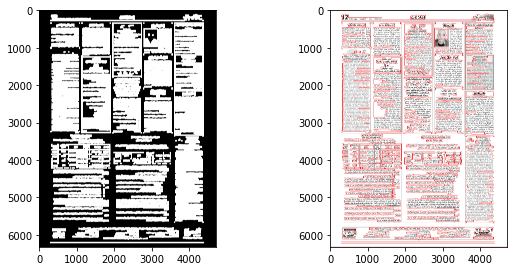

In [21]:
import numpy as np
import imutils
import cv2
import os 
from imutils import face_utils
import matplotlib.pyplot as plt
from skimage import io


#l.clear()
lien = os.path.join('/content/drive/My Drive/','ImagesFromPDF/0012.jpg')
image = cv2.imread(lien)

l = []

blur = cv2.GaussianBlur(image, (5, 5), 0)
thresh4=cv2.threshold(blur,120, 255,cv2.THRESH_BINARY_INV)[1]
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(thresh4,kernel,iterations = 10)
l.append(dilation)

# using a findContours() function
thre=cv2.threshold(dilation,120, 255,cv2.THRESH_BINARY_INV)[1]
img_gray = cv2.cvtColor(thre, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# list for storing names of shapes
for contour in contours:      
    # using drawContours() function
    cv2.drawContours(image, [contour], 0, (255, 0, 0), 5)
# displaying the image after drawing contours
l.append(image)

# displaying the image after drawing contours
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(4,4,i+1)    # the number of images in the grid
    plt.imshow(l[i])
plt.show()

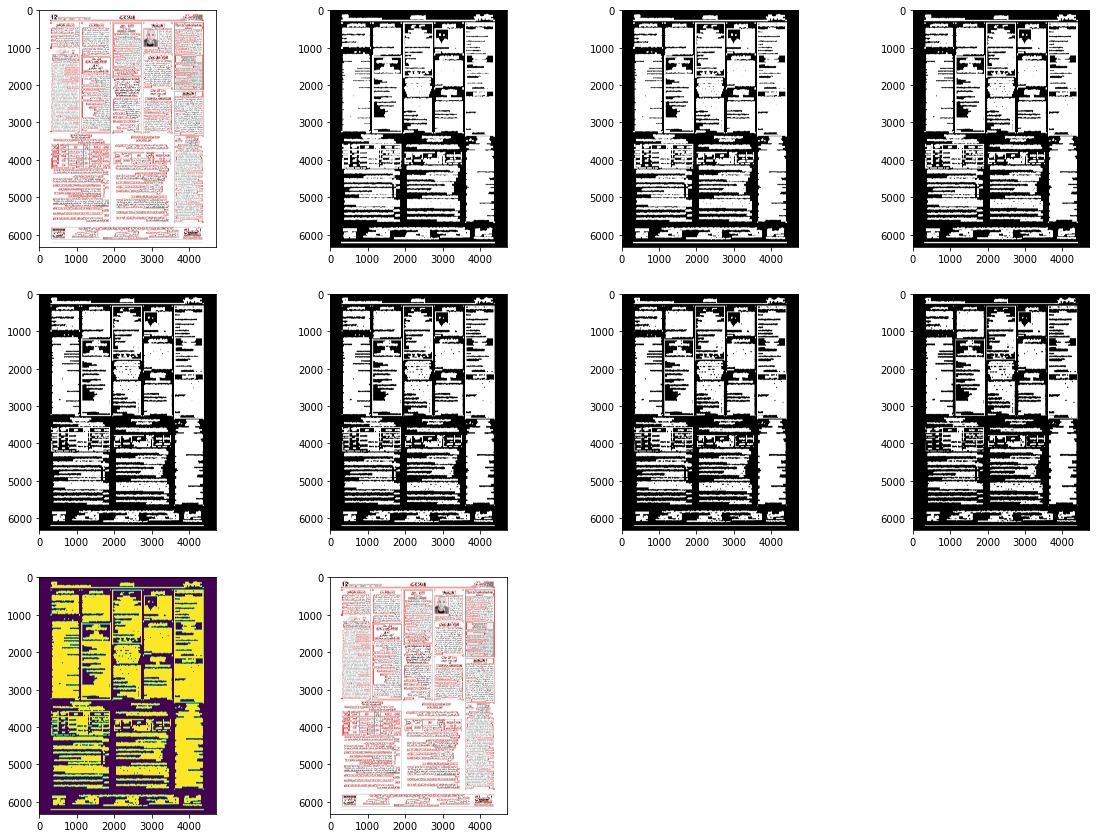

In [24]:
img = cv2.imread(lien)

c = []
dst = cv2.GaussianBlur(dilation,(5,5),cv2.BORDER_DEFAULT)


ernel = np.ones((5,5),np.uint8)
erode_img = cv2.erode(dst, kernel, iterations= 1)
erode_img2 = cv2.erode(dst, kernel, iterations= 2)
erode_img3 = cv2.erode(dst, kernel, iterations= 3)
erode_img33 = cv2.erode(dst, kernel, iterations= 4)
erode_img333 = cv2.erode(dst, kernel, iterations= 5)
erode_img3333 = cv2.erode(dst, kernel, iterations= 6)
c.append(img)
c.append(dst)
c.append(erode_img)
c.append(erode_img2)
c.append(erode_img3)
c.append(erode_img33)
c.append(erode_img333)
c.append(erode_img3333)


#contour
img_gray = cv2.cvtColor(erode_img3, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
i = 0
# list for storing names of shapes
for contour in contours:
  if i == 0:
    i = 1
    continue
  # cv2.approxPloyDP() function to approximate the shape
  approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)    
  # using drawContours() function
  cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)

c.append(threshold)
c.append(img)

#gray = cv2.cvtColor(erode_img, cv2.COLOR_GRAY2BGR)
#plt.imshow(erode_img)

plt.figure(figsize=(20,20))
for i in range(len(c)):
    plt.subplot(4,4,i+1)    # the number of images in the grid
    plt.imshow(c[i])
plt.show()